SET UP

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
# Load the data and store it in dataframe df:

import asyncio
import aiohttp

async def download(url, filename):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            if response.status == 200:
                with open(filename, 'wb') as f:
                    f.write(await response.read())
                    
                    
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

await download(file_path, "usedcars2.csv")
file_name="usedcars2.csv"

# Import the file to a pandas dataframe.
df = pd.read_csv(file_name, header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
# Create the linear regression object:

lm = LinearRegression()
lm

LinearRegression()

In [4]:
# How could "highway-mpg" help us predict car price?

X = df[["highway-mpg"]]
Y = df["price"]

# Fit the linear model using highway-mpg:
lm.fit(X,Y)

# We can output a prediction:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [5]:
# What is the value of the intercept (a)?

a = lm.intercept_

In [6]:
# What is the value of the slope (b)?

b = lm.coef_

In [7]:
# What is the final estimated linear model we get?

#Yhat = a + b X

# Plugging in the actual values we get:

Price = a + b*df[["highway-mpg"]]
Price

,highway-mpg
0,16236.504643
1,16236.504643
2,17058.238022
3,13771.304508
4,20345.171535
...,...
196,15414.771265
197,17879.971400
198,19523.438157
199,16236.504643


In [8]:
# Question #1 a):
# Create a linear regression object called "lm1".

lm1 = LinearRegression()
lm1

LinearRegression()

In [9]:
# Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [10]:
# Find the slope and intercept of the model.

# Slope
b2 = lm1.coef_

# Intercept
a2 = lm1.intercept_

In [11]:
# What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

# using X and Y  
#Yhat=-7963.34 + 166.86*df[['engine-size']]
#Yhat

Price2 = a2 + b2 * df[['engine-size']]
Price2

,engine-size
0,13728.463134
1,13728.463134
2,17399.383479
3,10224.402804
4,14729.623228
...,...
196,15563.923306
197,15563.923306
198,20903.443808
199,16231.363369


In [12]:
# Multiple regression

#Yhat = a + b1X1 + b2X2 + b3X3 + b4X4

# Let's develop a model using these variables as the predictor variables.

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [13]:
lm3 = LinearRegression()
lm3

LinearRegression()

In [14]:
# Fit the linear model using the four above-mentioned variables.

g = lm3.fit(Z, df[["price"]])
g

LinearRegression()

In [15]:
# What is the value of the intercept(a)?

a_3 = lm3.intercept_
a_3

array([-15806.62462633])

In [16]:
# What are the values of the coefficients (b1, b2, b3, b4)?

b_3 = lm3.coef_
b_3

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

In [17]:
# Yhat = a + b1X1 + b2X2 + b3X3 + b4X4

Price3 = -15806.62462633 + (53.49574423*df[["horsepower"]]) + (4.70770099*df[["curb-weight"]]) + (81.53026382*df[["engine-size"]]) + (36.05748882*df[["highway-mpg"]])
Price3

,curb-weight,engine-size,highway-mpg,horsepower
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
196,NaN,NaN,NaN,NaN
197,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN
199,NaN,NaN,NaN,NaN


In [18]:
# Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

df[["peak-rpm","highway-mpg","price"]].corr()

# # The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


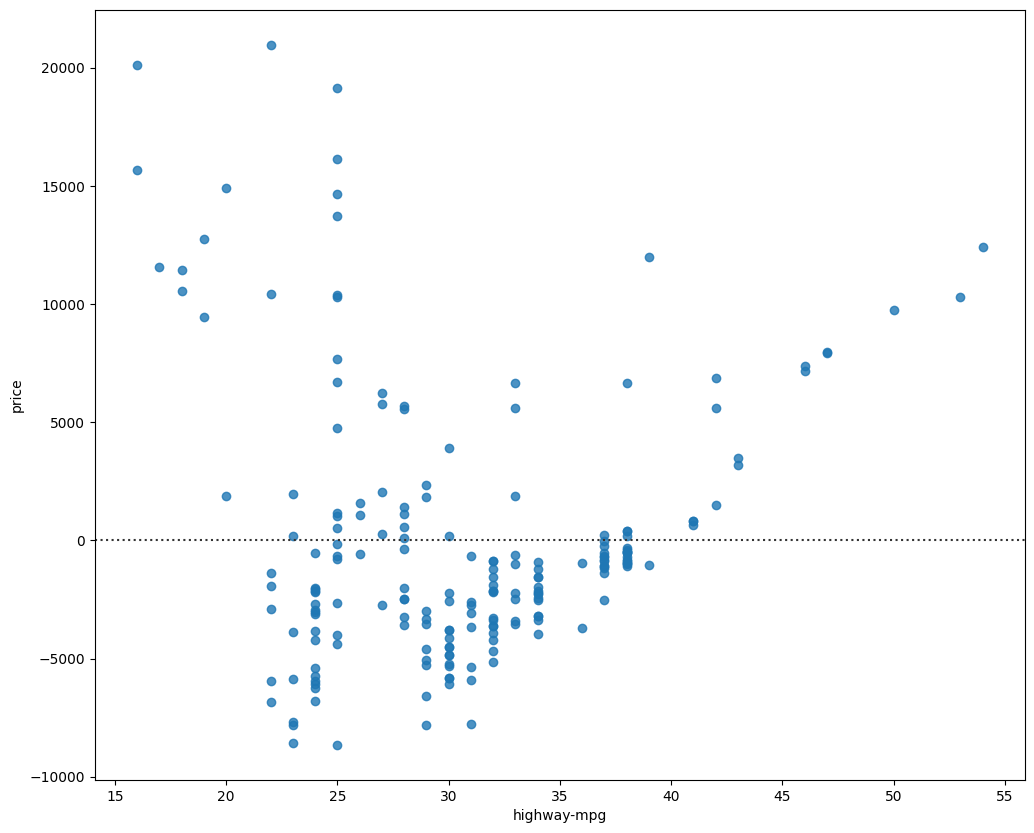

In [19]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [23]:
# Multiple Linear Regression
lm5 = LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm5.fit(Z, df[["price"]])
Y_hat = lm5.predict(Z)

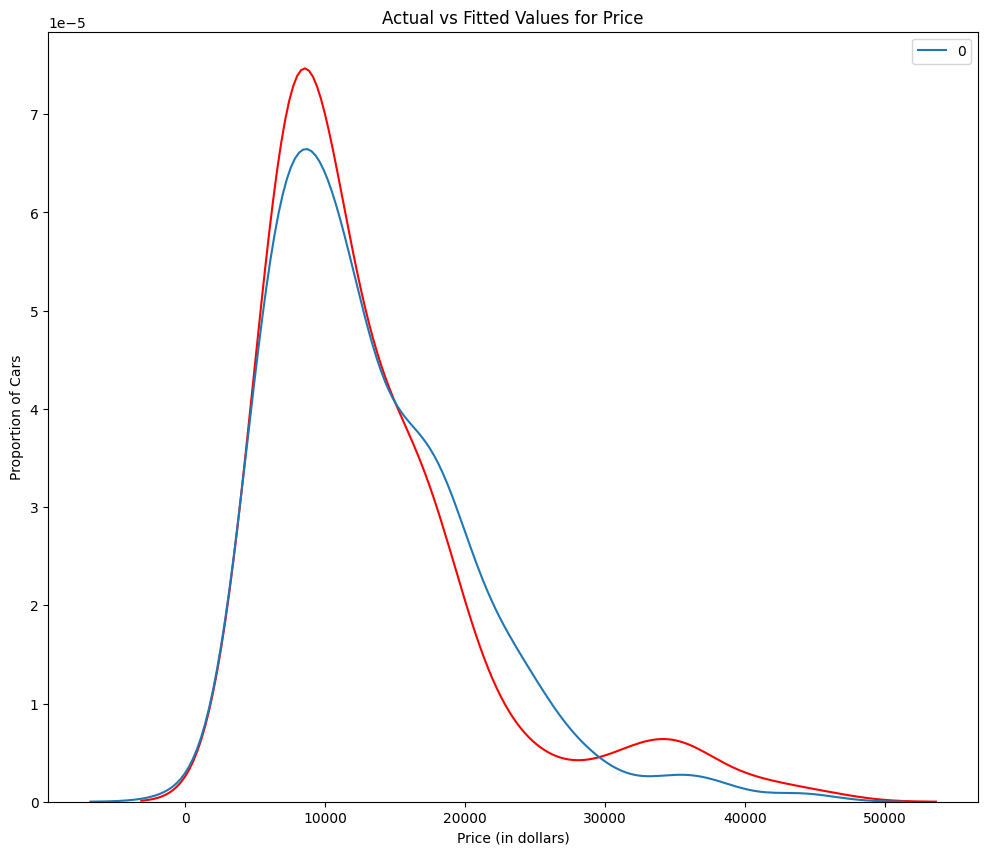

In [24]:
plt.figure(figsize=(width, height))


ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(Y_hat,color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

In [25]:
# Polynomial Regression and Pipelines

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
# Let's get the variables:

x = df['highway-mpg']
y = df['price']

In [27]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


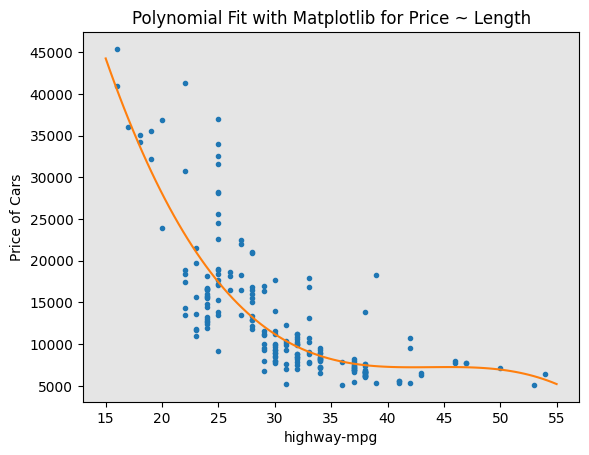

In [ ]:
# Let's plot the function:

PlotPolly(p, x, y, 'highway-mpg')

In [29]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


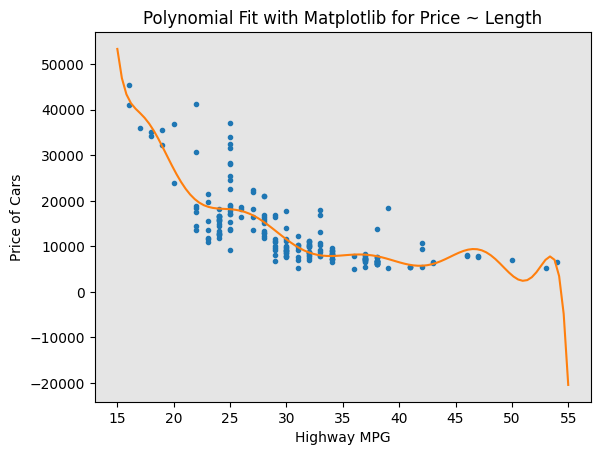

In [30]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [31]:
# We can perform a polynomial transform on multiple features. First, we import the module:

from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# We create a PolynomialFeatures object of degree 2

pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [33]:
Z_pr=pr.fit_transform(Z)

In [ ]:
# In the original data, there are 201 samples and 4 features.
Z.shape

(201, 4)

In [ ]:
# After the transformation, there are 201 samples and 15 features.
Z_pr.shape

(201, 15)

### Pipeline

#### Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [38]:
# We input the list as an argument to the pipeline constructor:

pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [39]:
# First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.
# Then, we can normalize the data, perform a transform and fit the model simultaneously.

Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [40]:
# Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [41]:
# Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# 4. Measures for In-Sample Evaluation

### R-squared
R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.
The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

### Mean Squared Error (MSE)
The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ)

Model 1: Simple Linear Regression

In [42]:
# Let's calculate the R^2:

#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [43]:
# Let's calculate the MSE:

# We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [44]:
# Let's import the function mean_squared_error from the module metrics:

from sklearn.metrics import mean_squared_error

In [45]:
# We can compare the predicted results with the actual results:

mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


Model 2: Multiple Linear Regression

In [46]:
# Let's calculate the R^2:

# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [47]:
# Let's calculate the MSE.

# We produce a prediction:

Y_predict_multifit = lm.predict(Z)

In [48]:
# We compare the predicted results with the actual results:

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


Model 3: Polynomial Fit

In [49]:
# Let's calculate the R^2.

# Let’s import the function r2_score from the module metrics as we are using a different function.

from sklearn.metrics import r2_score

In [50]:
# We apply the function to get the value of R^2:

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

In [51]:
# We can also calculate the MSE:

mean_squared_error(df['price'], p(x))

np.float64(20474146.426361218)

# 5. Prediction and Decision Making

### Prediction

In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [52]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [53]:
# Create a new input:

new_input=np.arange(1, 100, 1).reshape(-1, 1)

# Fit the model:

lm.fit(X, Y)
lm

LinearRegression()

In [54]:
# Produce a prediction:

yhat=lm.predict(new_input)
yhat[0:5]

c:\Users\LENOVO\Documents\Python\courses\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

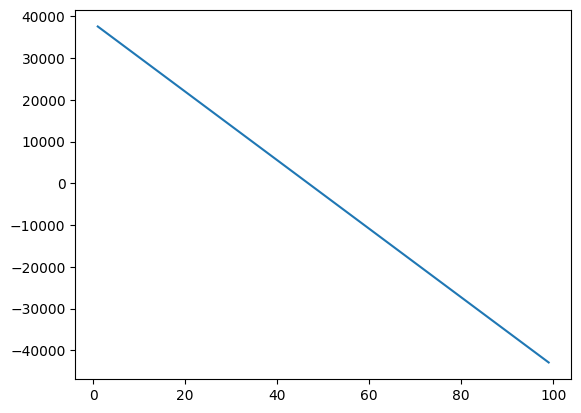

In [55]:
# We can plot the data:

plt.plot(new_input, yhat)
plt.show()

# Decision Making: Determining a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

* What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

* What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.

### Let's take a look at the values for the different models.
Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

* R-squared: 0.49659118843391759
* MSE: 3.16 x10^7

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

* R-squared: 0.80896354913783497
* MSE: 1.2 x10^7

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

* R-squared: 0.6741946663906514
* MSE: 2.05 x 10^7

# Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)

Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

* MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
* R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

# Simple Linear Model (SLR) vs. Polynomial Fit

* MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
* R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.

Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

# Multiple Linear Regression (MLR) vs. Polynomial Fit

* MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
* R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.

# Conclusion

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.